<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/DefenseSpending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas_datareader.data as web
import datetime

start, end = datetime.datetime(1959, 1, 1), datetime.datetime(1970, 12, 31)

# Nominal defense spending
defense_nom = web.DataReader("FDEFX", "fred", start, end)

# Defense deflator (2017=100)
defense_deflator = web.DataReader("A822RD3Q086SBEA", "fred", start, end)

# Convert to real (billions of chained 2017 $)
defense_real_calc = (defense_nom["FDEFX"] / defense_deflator["A822RD3Q086SBEA"]) * 100
defense_real_calc.head()

,0
DATE,
1959-01-01,596.109594
1959-04-01,588.367327
1959-07-01,599.414234
1959-10-01,594.634670
1960-01-01,583.720704


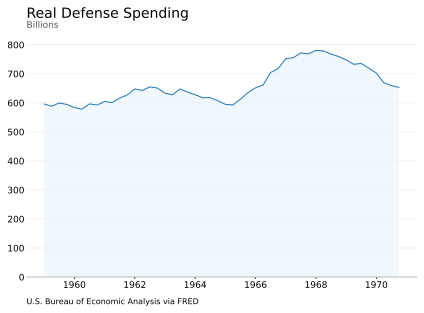

In [3]:
x, y = defense_real_calc.index, defense_real_calc.values

# --- NYT-style colors ---
line_color = '#1f77b4'
fill_color = "#e6f1fb"
forecast_fill = "#dfeaf7"
grid_color = '#e6e6e6'

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_ylim(0, max(y)*1.10)
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Real Defense Spending', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Billions", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("U.S. Bureau of Economic Analysis via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

fig.savefig("real_def.png", bbox_inches="tight", dpi=300)
plt.show()